In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download
from nltk.stem import PorterStemmer
import re
from wordcloud import WordCloud
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from pipelines.tokenizers import tweet_tokenizer

[nltk_data] Downloading package stopwords to /home/vasily/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('../data/preprocessed.csv')
df

,ticker,text,lang,in_reply_to,is_quote_status,retweeted_tweet,possibly_sensitive,favorited,date,quote_count,...,view_count_state,retweet_count,is_translatable,edits_remaining,has_card,thumbnail_title,urls,hashtags,user,1_day_after
0,AAPL,$META Zuckerberg has said that they would be t...,en,NaN,False,NaN,0.0,False,2024-10-05 14:01:00+00:00,64.0,...,EnabledWithCount,143.0,0.0,5.0,False,NaN,[],[],NaN,0
1,AAPL,"You can follow all market news, including for ...",en,1.839838e+18,False,NaN,0.0,False,2024-09-28 04:40:04+00:00,0.0,...,EnabledWithCount,0.0,0.0,5.0,False,NaN,[{'display_url': 'unusualwhales.com/news-feed'...,[],NaN,1
2,AAPL,JUST IN: Apple $AAPL is now reportedly no long...,en,NaN,False,NaN,NaN,False,2024-09-28 01:21:45+00:00,92.0,...,EnabledWithCount,403.0,0.0,5.0,False,NaN,[],[],NaN,1
3,AAPL,"Apple, $AAPL, is no longer a ‘growth engine’ f...",en,NaN,False,NaN,NaN,False,2024-09-26 11:57:00+00:00,6.0,...,EnabledWithCount,26.0,0.0,5.0,False,NaN,[],[],NaN,1
4,AAPL,Here are the hottest and most active bullish a...,en,NaN,False,NaN,0.0,False,2024-09-23 18:53:35+00:00,1.0,...,EnabledWithCount,19.0,0.0,5.0,False,NaN,[{'display_url': 'unusualwhales.com/hottest-co...,[],NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393,SBUX,Probably time to go overweight $SBUX on the GS...,en,NaN,False,NaN,NaN,False,2014-01-21 20:18:11+00:00,0.0,...,Enabled,0.0,0.0,5.0,False,NaN,[],[],DumbLuckCapital,0
8394,SBUX,Are there problems brewing at Wall Street's co...,en,NaN,False,NaN,0.0,False,2014-01-14 23:10:46+00:00,0.0,...,Enabled,13.0,0.0,5.0,False,NaN,"[{'display_url': 'cnb.cx/19s0hUh', 'expanded_u...",[],CNBC,1
8395,SBUX,Get @HedgeyeHWP on that #NRNPowerList !! $DRI...,en,NaN,False,NaN,NaN,False,2014-01-13 17:22:02+00:00,0.0,...,Enabled,1.0,0.0,5.0,False,NaN,[],['NRNPowerList'],"Fernando Valle, CFA",0
8396,SBUX,Serious question: who needs who more... White ...,en,NaN,False,NaN,NaN,False,2014-01-04 15:21:52+00:00,0.0,...,Enabled,0.0,0.0,5.0,False,NaN,[],[],DumbLuckCapital,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8398 entries, 0 to 8397
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ticker              8398 non-null   object 
 1   text                8398 non-null   object 
 2   lang                8398 non-null   object 
 3   in_reply_to         1365 non-null   float64
 4   is_quote_status     8398 non-null   bool   
 5   retweeted_tweet     0 non-null      float64
 6   possibly_sensitive  5389 non-null   float64
 7   favorited           8398 non-null   bool   
 8   date                8398 non-null   object 
 9   quote_count         8398 non-null   float64
 10  reply_count         8398 non-null   float64
 11  favorite_count      8398 non-null   float64
 12  view_count          2016 non-null   float64
 13  view_count_state    8398 non-null   object 
 14  retweet_count       8398 non-null   float64
 15  is_translatable     8398 non-null   float64
 16  edits_

Атрибуты с пропусками: in_reply_to, retweeted_tweet, possibly_sensitive, view_count, edits_remaining, thumbnail_title, user

In [4]:
df = df.drop('retweeted_tweet', axis=1)

### Описание атрибутов ###
- **username** - Username
- **name** - Author of the tweet
- **text** - The full text of the tweet
- **lang** - The language of the tweet
- **in_reply_to** - The tweet ID this tweet is in reply to, if any
- **is_quote_status** - Indicates if the tweet is a quote status
- **retweeted_tweet** - The Tweet being retweeted (if any)
- **possibly_sensitive** - Indicates if the tweet content may be sensitive
- **favorited** - Indicates if the tweet is favorited
- **date** - The date and time when the tweet was created
- **quote_count** - The count of quotes for the tweet
- **reply_count** - The count of replies to the tweet
- **favorite_count** - The count of favorites or likes for the tweet
- **view_count** - The count of views
- **view_count_state** - The state of the tweet views
- **retweet_count** - The count of retweets for the tweet
- **place** - The location associated with the tweet
- **is_translatable** - Indicates if the tweet is translatable
- **edits_remaining** - The remaining number of edits allowed for the tweet
- **has_card** - Indicates if the tweet contains a card
- **thumbnail_title** - The title of the webpage displayed inside the tweet’s card
- **urls** - Information about URLs contained in the tweet
- **hashtags** - Hashtags included in the tweet text

Заменем признак in_reply_to на признак is_in_reply_to, указывающий на тип твита, является он ответом на другой твит или нет: ответ (1), иначе (0). В целом, было бы полезно узнать информацию о твите, на который был отправлен ответ, но данный датасет такой информации в себе не хранит.

In [5]:
df['is_in_reply_to'] = df['in_reply_to'].fillna(0).apply(lambda x: 0 if x == 0 else 1)
df.drop('in_reply_to', axis=1, inplace=True)

In [6]:
df['is_quote_status'] = df['is_quote_status'].astype(int)

In [7]:
df['favorited'] = df['favorited'].astype(int)

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['has_card'] = df['has_card'].astype(int)

In [10]:
df.describe()

,is_quote_status,possibly_sensitive,favorited,quote_count,reply_count,favorite_count,view_count,retweet_count,is_translatable,edits_remaining,has_card,1_day_after,is_in_reply_to
count,8398.000000,5389.0,8398.0,8398.000000,8398.000000,8398.000000,2.016000e+03,8398.000000,8398.000000,8377.0,8398.000000,8398.000000,8398.000000
mean,0.035723,0.0,0.0,5.759943,15.401405,203.813289,2.318543e+05,30.744225,0.000119,5.0,0.071207,0.530841,0.162539
std,0.185609,0.0,0.0,37.193766,69.910450,1114.401340,1.417993e+06,187.710249,0.010912,0.0,0.257186,0.499078,0.368966
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.900000e+01,0.000000,0.000000,5.0,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.0,0.000000,0.000000,2.000000,2.575925e+04,0.000000,0.000000,5.0,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.0,0.000000,1.000000,8.000000,8.540450e+04,3.000000,0.000000,5.0,0.000000,1.000000,0.000000
75%,0.000000,0.0,0.0,1.000000,5.000000,33.000000,1.942162e+05,12.000000,0.000000,5.0,0.000000,1.000000,0.000000
max,1.000000,0.0,0.0,1091.000000,2848.000000,36249.000000,6.080795e+07,7625.000000,1.000000,5.0,1.000000,1.000000,1.000000


In [11]:
df['possibly_sensitive'].value_counts()

possibly_sensitive
0.0    5389
Name: count, dtype: int64

In [12]:
df = df.drop('possibly_sensitive', axis=1)

In [13]:
df['favorited'].value_counts()

favorited
0    8398
Name: count, dtype: int64

In [14]:
df = df.drop('favorited', axis=1)

In [15]:
df['view_count'] = df['view_count'].fillna(df['view_count'].median())

In [16]:
df = df.drop('is_translatable', axis=1)

In [17]:
df['edits_remaining'].value_counts()

edits_remaining
5.0    8377
Name: count, dtype: int64

Максимальное число оставшихся попыток равно 5.

In [18]:
df = df.drop('edits_remaining', axis=1)

In [19]:
df.select_dtypes(include='number').isna().sum()

is_quote_status    0
quote_count        0
reply_count        0
favorite_count     0
view_count         0
retweet_count      0
has_card           0
1_day_after        0
is_in_reply_to     0
dtype: int64

In [20]:
df.describe(include='object')

,ticker,text,lang,view_count_state,thumbnail_title,urls,hashtags,user
count,8398,8398,8398,8398,582,8398,8398,7497
unique,30,7606,26,2,475,3852,254,22
top,AMZN,The Dow would be green if:\n\nGS\nINTC\nTRV\nJ...,en,Enabled,This CEO Made AMD Billions – Now She Wants To ...,[],[],CNBC
freq,907,12,8231,6382,12,3789,7979,2160


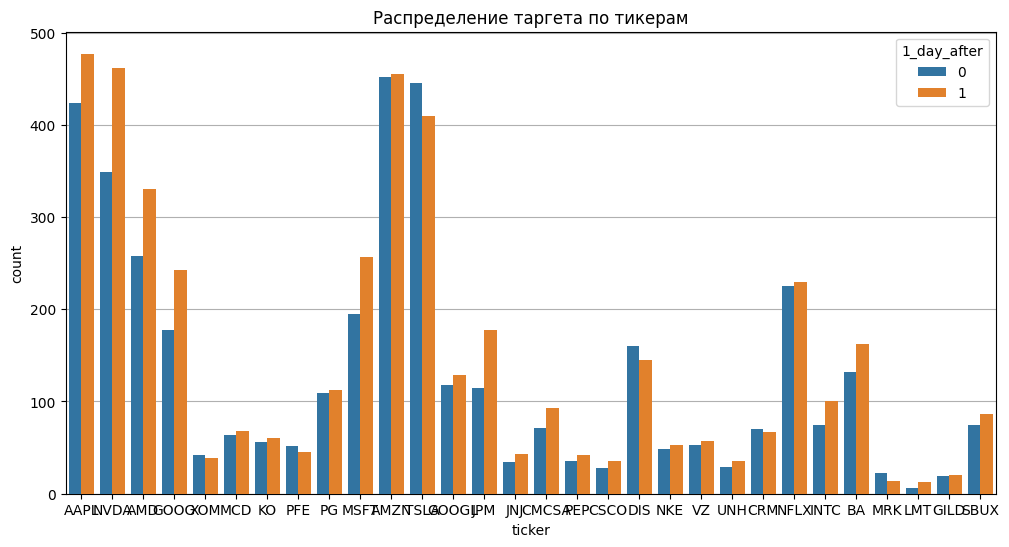

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(data=df, x='ticker', hue='1_day_after', ax=ax, zorder=3)

ax.grid(axis='y', zorder=1)

plt.title('Распределение таргета по тикерам')
plt.show()

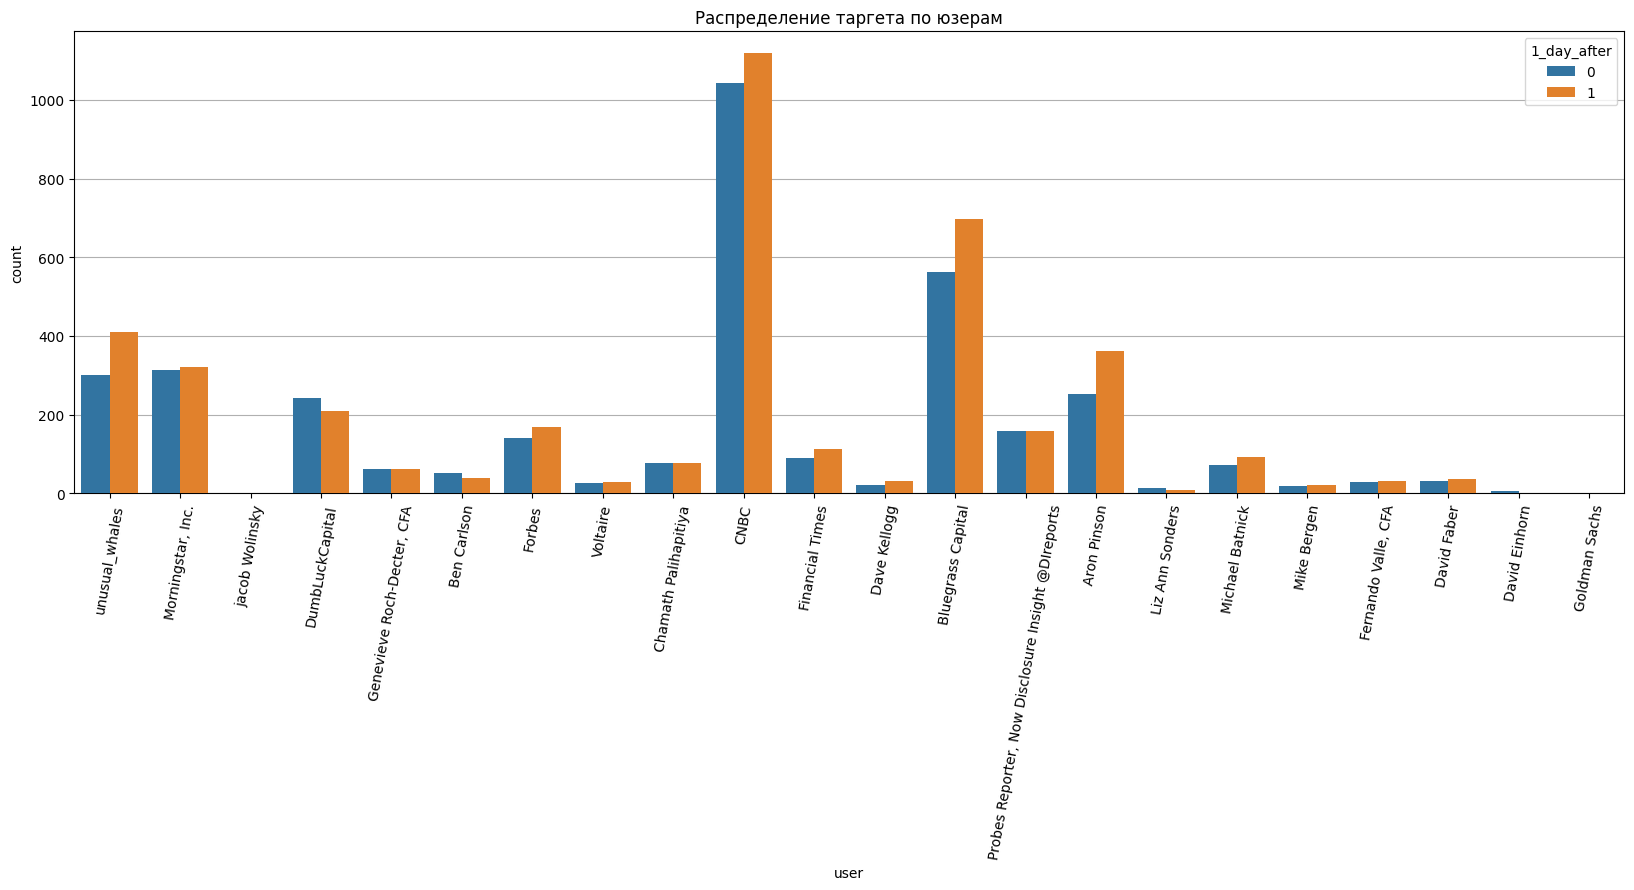

In [22]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.countplot(data=df, x='user', hue='1_day_after', ax=ax, zorder=3)

ax.grid(axis='y', zorder=1)

plt.title('Распределение таргета по юзерам')
plt.xticks(rotation=80)
plt.show()

In [23]:
df = df.drop(['ticker', 'user'], axis=1)

In [24]:
df[df['lang'] != 'en'].text.values

array(['Glassdoor approval ratings:  \n\nJensen Huang , $NVDA: 97%\nSundar Pichai , $GOOGL: 94%\nTim Cook , $AAPL: 87%\nMark Zuckerberg, $META: 66%\nAndy Jassy, $AMZN: 54%',
       'Glassdoor approval ratings:  \n\nJensen Huang , $NVDA: 97%\nSundar Pichai , $GOOGL: 94%\nTim Cook , $AAPL: 87%\nMark Zuckerberg, $META: 66%\nAndy Jassy, $AMZN: 54%',
       'Nvidia, $NVDA, CEO discusses future of AI: https://t.co/5nKVnw8ddz',
       '@buccocapital $NVDA',
       '@SpinoffReview super generic, but... LSXMA, GLIBA, GOOG, AABA, DWDP, CMCSA',
       '@UnHedgedChatter @BongCapital V, PCLN, GOOG, SHW, SCHW, BAM, MCO, BUD, WSO, WBA, CVS, INFO, ADS, DG, WLTW, TMO, EBAY, GRA',
       'Coho Capital 2016 shareholder letter; profiles BABA FB GOOG V SPGI https://t.co/qfmkAdqJlD ht @UnHedgedChatter',
       '@IntrinsicInv V BUD MCO PCLN GOOG CVS',
       '@EventDrivenMgr right up there with MCO, SPGI, PCLN, SCHW, AMZN, FB, MA, V, GOOG, CHTR, BRK',
       '$MSFT IPO in 1986. Profitable since 1982.\n$GOOG 

In [25]:
df = df.drop('lang', axis=1)

view_count_state это категориальный признак, он показывает доступность получения информации о просмотренных твитах. Этот признак содержит только две категории, поэтому его можно перекодировать в бинарный - 1, если кол-во просмотров доступно; 0, если кол-во твитов недоступно.

In [26]:
df['view_count_state'].value_counts()

view_count_state
Enabled             6382
EnabledWithCount    2016
Name: count, dtype: int64

In [27]:
df['is_view_count'] = df['view_count_state'].apply(lambda x: 1 if x == 'EnabledWithCount' else 0)
df = df.drop('view_count_state', axis=1)

In [28]:
df['urls'].unique()

array(['[]',
       "[{'display_url': 'unusualwhales.com/news-feed', 'expanded_url': 'http://unusualwhales.com/news-feed', 'url': 'https://t.co/NZ42mMeaYO', 'indices': [63, 86]}, {'display_url': 'unusualwhales.com/custom-alerts', 'expanded_url': 'http://unusualwhales.com/custom-alerts', 'url': 'https://t.co/VvWEbsHeAy', 'indices': [167, 190]}]",
       "[{'display_url': 'unusualwhales.com/hottest-contra…', 'expanded_url': 'https://unusualwhales.com/hottest-contracts', 'url': 'https://t.co/s2le2hzhoz', 'indices': [242, 265]}]",
       ...,
       "[{'display_url': 'cnb.cx/IA6u0E', 'expanded_url': 'http://cnb.cx/IA6u0E', 'url': 'http://t.co/0jHQpgry5L', 'indices': [102, 124]}]",
       "[{'display_url': 'cnb.cx/19s0hUh', 'expanded_url': 'http://cnb.cx/19s0hUh', 'url': 'http://t.co/TaZX7UYO6M', 'indices': [101, 123]}]",
       "[{'display_url': 'cnb.cx/1a4jY2V', 'expanded_url': 'http://cnb.cx/1a4jY2V', 'url': 'http://t.co/heq8hKD65g', 'indices': [56, 78]}]"],
      dtype=object)

Упростим этот признак до проверки наличия ссылок в твите.

In [29]:
df['is_urls'] = df['urls'].apply(lambda x: 1 if x != '[]' else 0)

In [30]:
df = df.drop('urls', axis=1)

# Текстовые признаки

In [31]:
df['thumbnail_title'] = df['thumbnail_title'].fillna('')

In [32]:
df[df['thumbnail_title'] != ''][['text', 'thumbnail_title']].sample(5)

,text,thumbnail_title
1879,AMD revenue drops 9% as PC chip sales decline ...,AMD revenue drops 9% as PC chip sales decline ...
6768,The first film in a new Star Wars trilogy coul...,Star Wars $2B gross to boost Disney: Analyst
5604,Analyst call of the day for @CNBCPro subscribe...,Here are Tuesday's biggest analyst calls: Appl...
1788,Stocks making the biggest moves midday: Alphab...,Stocks making the biggest moves midday: Alphab...
7872,"BA.5-specific Covid boosters from Pfizer, Mode...","BA.5-specific Covid boosters from Pfizer, Mode..."


In [33]:
df.loc[2224]['text']

'AMD, Nvidia must do more to stop cryptominers from causing PC gaming card shortages, price gouging https://t.co/FJ0555tO8C'

In [34]:
df.loc[2224]['thumbnail_title']

'AMD, Nvidia must do more to stop cryptominers from causing PC gaming card shortages, price gouging'

In [35]:
df['hashtags'].unique()

array(['[]', "['dividend', 'AAPL', 'NVDA']", "['MagnificentSeven']",
       "['interestrates', 'bond']", "['Apple']", "['BTC']", "['AI']",
       "['WallStreet']", "['stockpicks']", "['Stocks']",
       "['bonds', 'AIboom', 'MagnificentSeven']", "['Fidelity']",
       "['Nvidia']", "['tech']", "['SelfMadeWomen']", "['JPMTMC']",
       "['ForbesCIO']", "['Just100']", "['buzzwordbingo']",
       "['Investors', 'weekahead', 'earnings', 'tech']",
       "['Investors', 'WeekAhead']", "['corpgov']", "['Alphabet']",
       "['ConfessYourUnpopularOpinion']", "['s']", "['stocks']",
       "['Songza', 'Beats']", "['oldwall']",
       "['Dividend', 'Energy', 'Oil']", "['Exxon', 'oil']",
       "['Energy', 'Oil']", "['easygame']", "['investing']",
       "['Dividend']", "['WeekAhead', 'Tech', 'Earnings']",
       "['McDonald']", "['DeliveringAlpha']", "['NRNPowerList']",
       "['dividendstocks']", "['Walmart', 'CocaCola', 'Clorox']",
       "['volatility']", "['Coke']", "['retail', 'investing']"

In [36]:
df[df['hashtags'] != '[]'][['text', 'hashtags']].sample(5)

,text,hashtags
8247,We know the debate about how early is “too ear...,"['pumpkinspicelattes', 'Starbucks']"
2506,#Investors: Here's what you should have on you...,"['Investors', 'WeekAhead']"
4961,Trying again larger. 3/3 $TSLA #ElonMusk \n\n...,['ElonMusk']
7249,An investor advocate asked Netflix to disclose...,['ESG']
2974,How Toni Ko built a $500 million cosmetics bra...,['SelfMadeWomen']


In [37]:
df['hashtags'] = df['hashtags'].apply(lambda x: ' '.join(eval(x)))

In [38]:
def clean_tweet(text):
    """
    Очистка текста твита.
    """
    text = text.lower()
    text = re.sub(r"\$\b([a-z]+)\b", r"\1tckr", text)
    text = re.sub(r"\d+\w?\$", "pricetkn", text)
    text = re.sub(r"\b\d+\b", "numtkn", text)
    text = re.sub(r"http\S+", "linktkn", text)
    return text

df['text'] = df['text'].apply(clean_tweet)

In [39]:
def plot_words(data, col_name, top_count=25):
    word_counts = data[col_name].apply(tweet_tokenizer).explode().value_counts()[:top_count]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts.to_dict())
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=word_counts.values, y=word_counts.index, palette='viridis')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {top_count} Most Frequent Words from {data[col_name].name}')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

/tmp/ipykernel_60946/551776017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts.values, y=word_counts.index, palette='viridis')


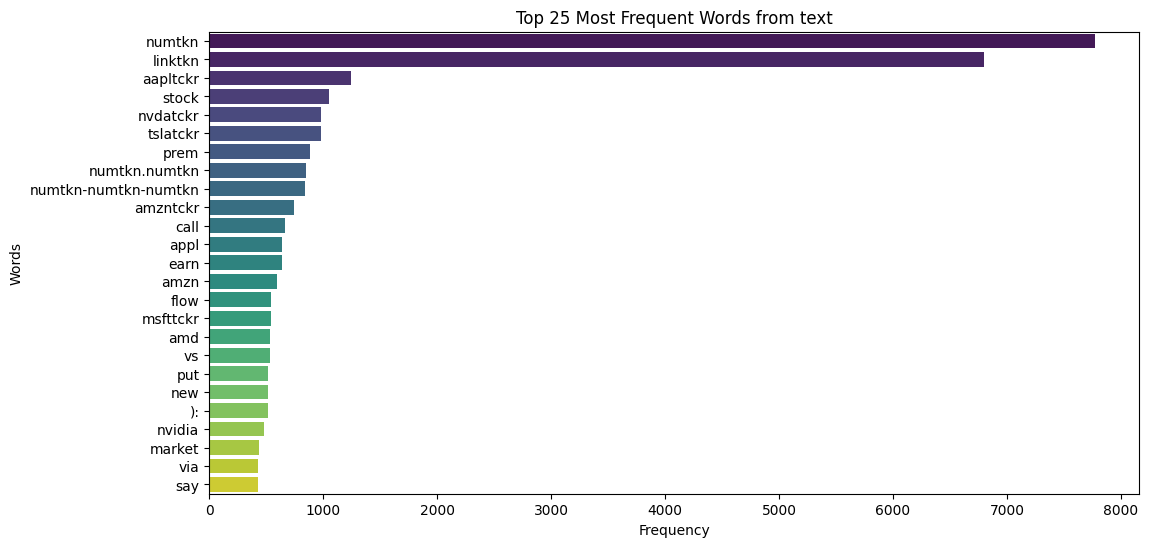

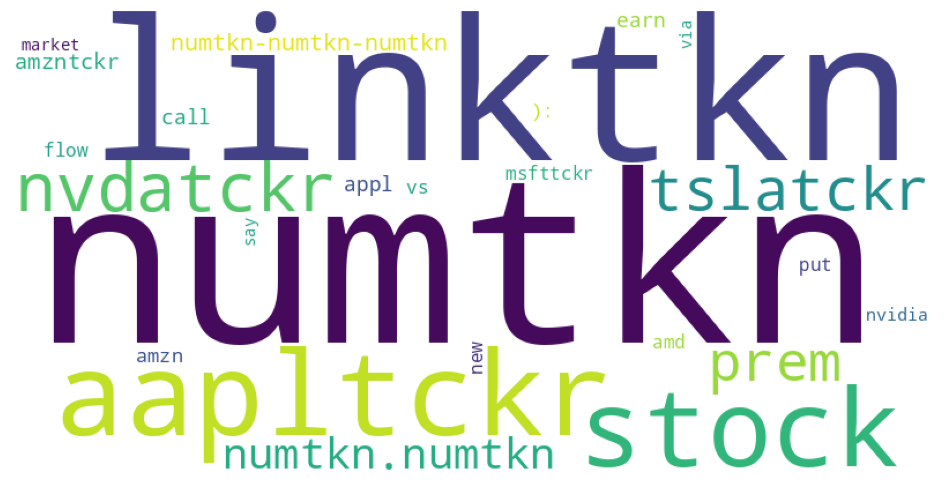

/tmp/ipykernel_60946/551776017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts.values, y=word_counts.index, palette='viridis')


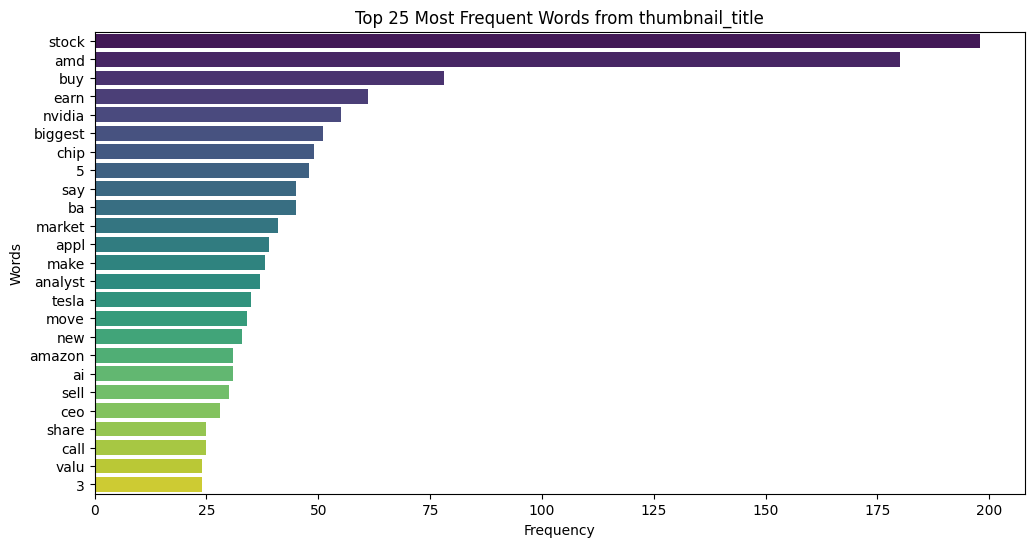

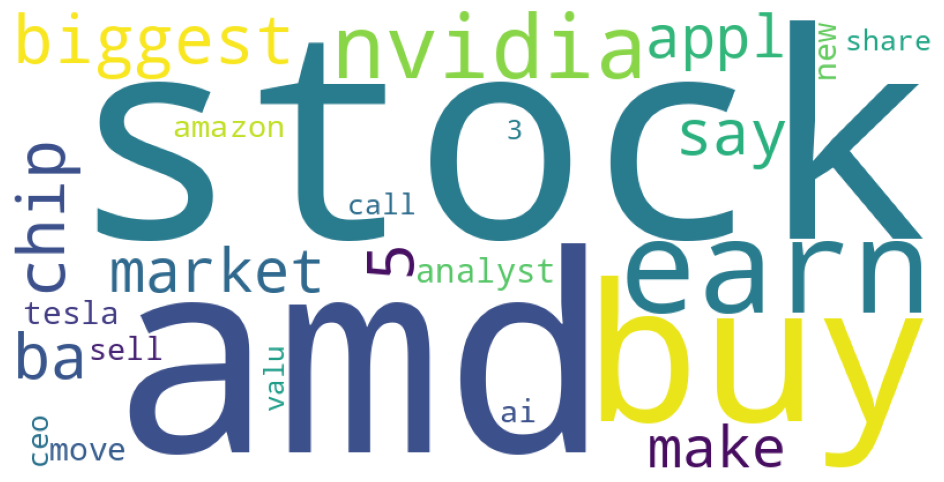

/tmp/ipykernel_60946/551776017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts.values, y=word_counts.index, palette='viridis')


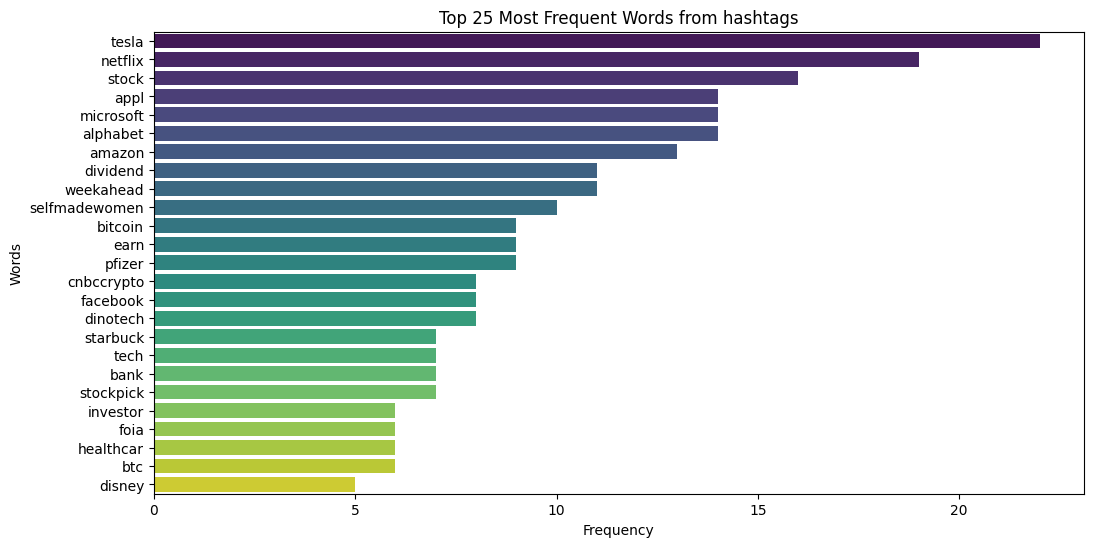

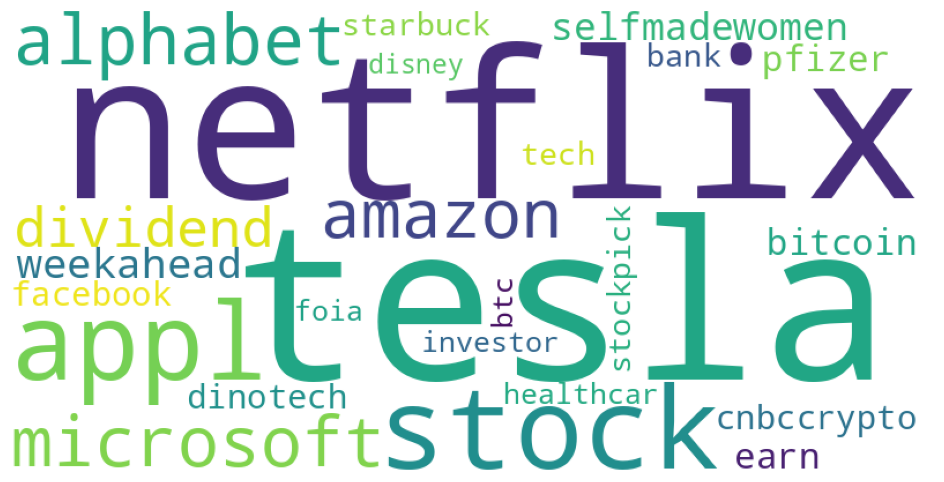

In [40]:
for col in ['text', 'thumbnail_title', 'hashtags']:
    plot_words(df, col)

In [41]:
df['is_urls'].value_counts()

is_urls
1    4609
0    3789
Name: count, dtype: int64

In [42]:
df['is_thumbnail_title'] = df['thumbnail_title'].apply(lambda x: 1 if x != '' else 0)
df['is_hashtags'] = df['hashtags'].apply(lambda x: 1 if x != '' else 0)
df = df.drop(['thumbnail_title', 'hashtags'], axis=1)

# Другие признаки

In [43]:
df = df.drop(['quote_count', 'reply_count', 'favorite_count', 'view_count', 'retweet_count', 'is_view_count'], axis=1)

In [44]:
df.head()

,text,is_quote_status,date,has_card,1_day_after,is_in_reply_to,is_urls,is_thumbnail_title,is_hashtags
0,metatckr zuckerberg has said that they would b...,0,2024-10-05 14:01:00+00:00,0,0,0,0,0,0
1,"you can follow all market news, including for ...",0,2024-09-28 04:40:04+00:00,0,1,1,1,0,0
2,just in: apple aapltckr is now reportedly no l...,0,2024-09-28 01:21:45+00:00,0,1,0,0,0,0
3,"apple, aapltckr, is no longer a ‘growth engine...",0,2024-09-26 11:57:00+00:00,0,1,0,0,0,0
4,here are the hottest and most active bullish a...,0,2024-09-23 18:53:35+00:00,0,1,0,1,0,0


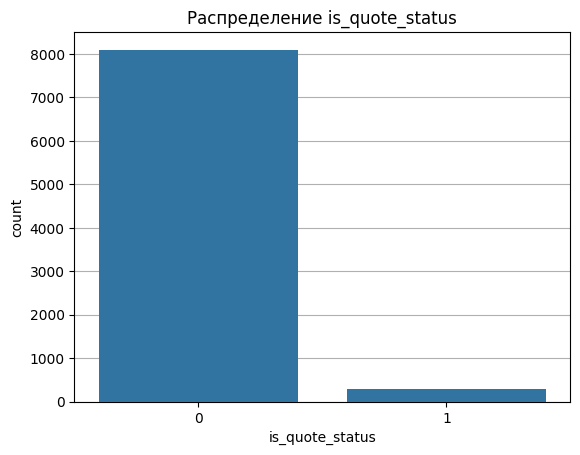

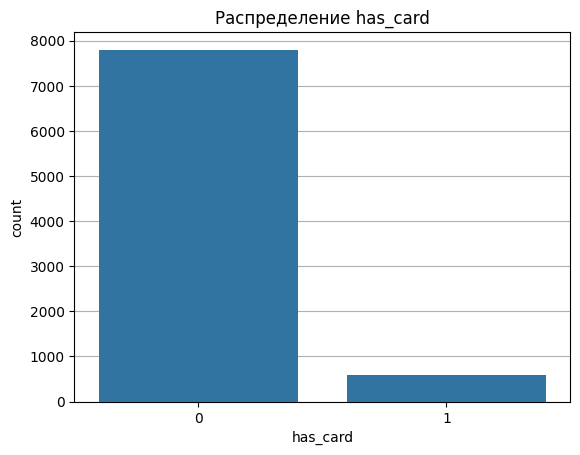

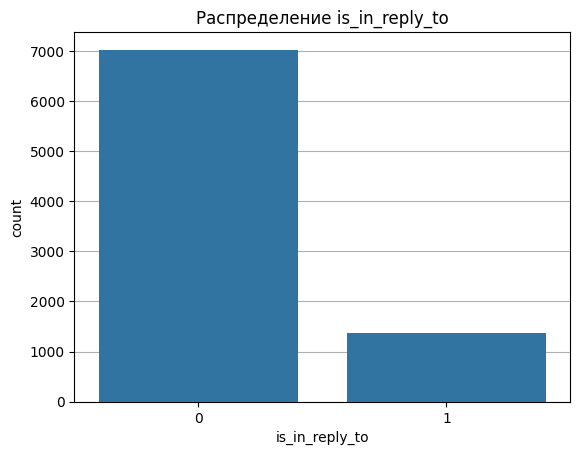

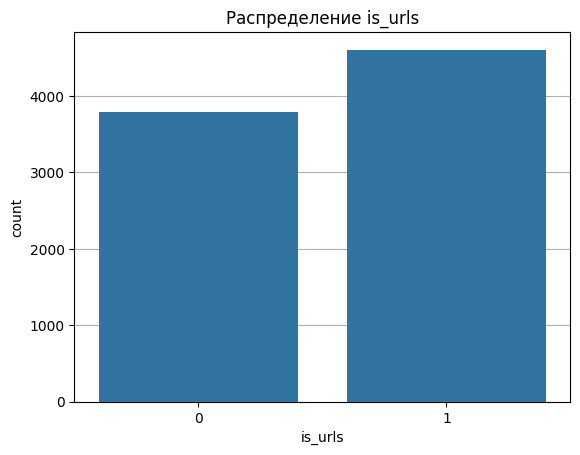

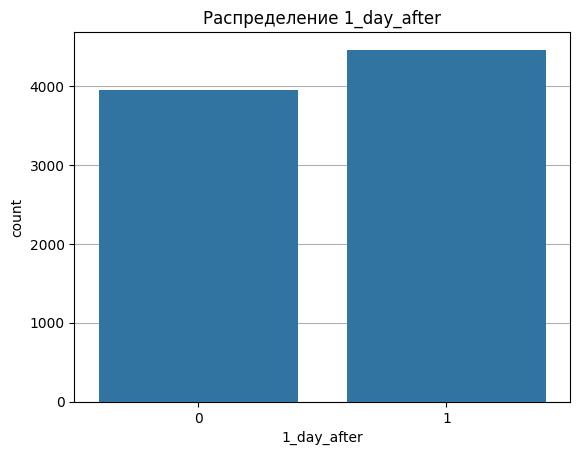

In [45]:
for col in ['is_quote_status', 'has_card', 'is_in_reply_to', 'is_urls', '1_day_after']:
    sns.countplot(data=df, x=col, zorder=3)
    
    plt.grid(axis='y', zorder=1)
    plt.title(f'Распределение {col}')
    plt.show()

In [46]:
df.date.describe()

count                                   8398
mean     2019-03-22 18:51:28.026792192+00:00
min                2014-01-02 18:51:17+00:00
25%                2016-04-22 17:11:46+00:00
50%                2018-09-06 19:44:15+00:00
75%      2022-11-14 14:10:05.750000128+00:00
max                2024-10-17 20:00:07+00:00
Name: date, dtype: object

In [47]:
df['date'].dt.day_of_week

0       5
1       5
2       5
3       3
4       0
       ..
8393    1
8394    1
8395    0
8396    5
8397    3
Name: date, Length: 8398, dtype: int32

In [48]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_of_week

df = df.drop('date', axis=1)

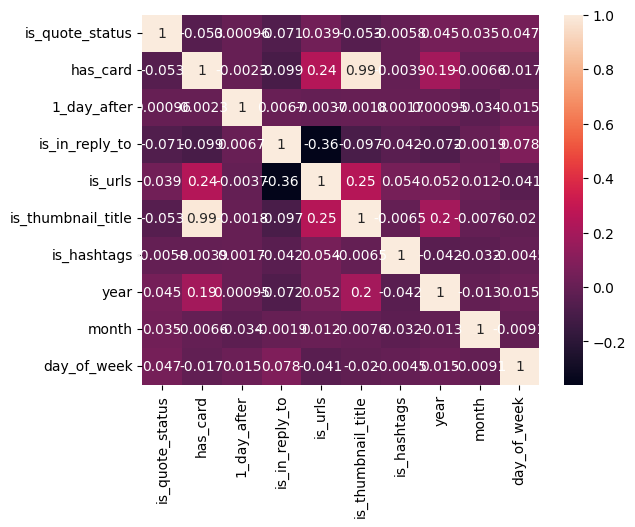

In [49]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

plt.show()

In [50]:
df.to_csv('../data/processed.csv', index=False, encoding="utf-8")